load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#  Get the list of sheet names in the Excel file
excel_file_path = "Crop Analysis.xlsx"
sheet_names = pd.ExcelFile(excel_file_path).sheet_names

# Create a dictionary to store the data frames for each sheet
sheet_data = {}

# Loop through each sheet and read the data into a data frame
for sheet_name in sheet_names:
    sheet_data[sheet_name] = pd.read_excel(excel_file_path, sheet_name)

In [23]:
sheet_names

['Introductory Information',
 'Corn Data',
 'Corn Questions',
 'Nitrogen Data',
 'Nitrogen Questions']

In [24]:
intro_df = sheet_data['Introductory Information']

pd.set_option('display.max_columns', None)

intro_df['Unnamed: 1'][1:].to_numpy()

array(['•Of the fertilizer consumed in the United States, corn accounts for nearly 50% of nutrient use (N, P, K) (Nitrogen (N), Phosphorus (P), and Potassium (K)). ',
       '•Corn acres (planted) and production (yield) are important datapoints to monitor. Data provided from 1980-2022 from USDA.',
       '•Nitrogen, Phosphate, and Potash application rates and acres treated are a common survey datapoint for USDA are used to estimate demand/consumption. Data provided from 1990-2003 from USDA.',
       '•Use the information in this excel file: Data Scientist 3: Excel Analysis to answer the questions in the “Corn Questions” and “Nitrogen Questions” tabs.'],
      dtype=object)

- Of the fertilizer consumed in the United States, corn accounts for nearly 50% of nutrient use (N, P, K) (Nitrogen (N), Phosphorus (P), and Potassium (K)). ',
- Corn acres (planted) and production (yield) are important datapoints to monitor. Data provided from 1980-2022 from USDA.',
- Nitrogen, Phosphate, and Potash application rates and acres treated are a common survey datapoint for USDA are used to estimate demand/consumption. Data provided from 1990-2003 from USDA.'

In [25]:
corn_df = sheet_data['Corn Data']
corn_questions = sheet_data['Corn Questions']
nitrogen_questions = sheet_data['Nitrogen Questions']
nitrogen_df = sheet_data['Nitrogen Data']

In [26]:
corn_df.head()

,Year,Geo Level,State,Commodity,Data Item,Value
0,2022,NATIONAL,US TOTAL,CORN,CORN - ACRES PLANTED,88589000
1,2022,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - ACRES HARVESTED",79115000
2,2022,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",13714676000
3,2021,NATIONAL,US TOTAL,CORN,CORN - ACRES PLANTED,93252000
4,2021,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - ACRES HARVESTED",85318000


In [30]:
corn_df.groupby('data_item', dropna=False).size()

data_item
CORN - ACRES PLANTED                        43
CORN, GRAIN - ACRES HARVESTED               43
CORN, GRAIN - PRODUCTION, MEASURED IN BU    43
dtype: int64

In [31]:
corn_df.dtypes

year          int64
geo_level    object
state        object
commodity    object
data_item    object
value         int64
dtype: object

In [33]:
nitrogen_df.columns = ['year', 'geo_level', 'region', 'commodity', 'data_item', 'domain',
       'domain_category', 'value']

In [36]:
nitrogen_df.groupby('data_item', dropna=False).size()

data_item
CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG    42
CORN - TREATED, MEASURED IN PCT OF AREA PLANTED, AVG      42
dtype: int64

In [39]:
nitrogen_df.columns

Index(['year', 'geo_level', 'region', 'commodity', 'data_item', 'domain',
       'domain_category', 'value'],
      dtype='object')

In [46]:
nitrogen_df.groupby(['data_item', 'domain_category']).agg({'value': 'sum'})

value
data_item                                          domain_category                
CORN - APPLICATIONS, MEASURED IN LB / ACRE / YE... FERTILIZER: (NITROGEN)   1841.6
                                                   FERTILIZER: (PHOSPHATE)   800.7
                                                   FERTILIZER: (POTASH)     1129.4
CORN - TREATED, MEASURED IN PCT OF AREA PLANTED... FERTILIZER: (NITROGEN)   1359.1
                                                   FERTILIZER: (PHOSPHATE)  1147.3
                                                   FERTILIZER: (POTASH)      970.1

In [47]:
nitrogen_df.loc[nitrogen_df['data_item']=='CORN - TREATED, MEASURED IN PCT OF AREA PLANTED, AVG', 'value'].min()

64.0

In [48]:
nitrogen_df.loc[nitrogen_df['data_item']=='CORN - TREATED, MEASURED IN PCT OF AREA PLANTED, AVG', 'value'].max()

99.0

the above data_item = CORN - TREATED, MEASURED IN PCT OF AREA PLANTED, can be interpreted as percentage, 


and the other metric - 'CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG' - represents value of NPK fertiliser applied in lb/acre/year units

In [49]:
nitrogen_df.loc[nitrogen_df['data_item']=='CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG', 'value'].min()

54.0

In [51]:
nitrogen_df.loc[nitrogen_df['data_item']=='CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG', 'value'].max()

137.0

In [52]:
nitrogen_df.head()

,year,geo_level,region,commodity,data_item,domain,domain_category,value
0,2003,REGION : MULTI-STATE,PROGRAM STATES,CORN,"CORN - APPLICATIONS, MEASURED IN LB / ACRE / Y...",FERTILIZER,FERTILIZER: (NITROGEN),136.0
1,2003,REGION : MULTI-STATE,PROGRAM STATES,CORN,"CORN - APPLICATIONS, MEASURED IN LB / ACRE / Y...",FERTILIZER,FERTILIZER: (PHOSPHATE),59.0
2,2003,REGION : MULTI-STATE,PROGRAM STATES,CORN,"CORN - APPLICATIONS, MEASURED IN LB / ACRE / Y...",FERTILIZER,FERTILIZER: (POTASH),85.0
3,2003,REGION : MULTI-STATE,PROGRAM STATES,CORN,"CORN - TREATED, MEASURED IN PCT OF AREA PLANTE...",FERTILIZER,FERTILIZER: (NITROGEN),96.0
4,2003,REGION : MULTI-STATE,PROGRAM STATES,CORN,"CORN - TREATED, MEASURED IN PCT OF AREA PLANTE...",FERTILIZER,FERTILIZER: (PHOSPHATE),79.0


In [28]:
corn_df.columns = ['year', 'geo_level', 'state', 'commodity', 'data_item', 'value']

#### Q1. Utilizing the provided data estimate the total amount of N, P, K applied on corn in the years 1990-2003

In [53]:
nitrogen_df.loc[((nitrogen_df['year']>=1990)&(nitrogen_df['year']<=2003)&(nitrogen_df['data_item']=='CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG')), 'value'].sum()

3771.7

Ans: 3771.7 lb/acre/year in average

### Q2. Based on both datasets, what can be said about nitrogen use related to corn production over time.

In [59]:
nitrogen_df.loc[((nitrogen_df['data_item']=='CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG')&(nitrogen_df['domain_category']=='FERTILIZER: (NITROGEN)')), 'value'].sum()

1841.6

In [60]:
corn_df.columns

Index(['year', 'geo_level', 'state', 'commodity', 'data_item', 'value'], dtype='object')

In [61]:
corn_df.groupby(['commodity', 'data_item']).size()

commodity  data_item                               
CORN       CORN - ACRES PLANTED                        43
           CORN, GRAIN - ACRES HARVESTED               43
           CORN, GRAIN - PRODUCTION, MEASURED IN BU    43
dtype: int64

In [ ]:
corn_df.loc[corn_df['data_item']=='CORN, GRAIN - PRODUCTION, MEASURED IN BU']

In [62]:
corn_df.columns

Index(['year', 'geo_level', 'state', 'commodity', 'data_item', 'value'], dtype='object')

In [63]:
nitrogen_df.columns

Index(['year', 'geo_level', 'region', 'commodity', 'data_item', 'domain',
       'domain_category', 'value'],
      dtype='object')

In [64]:
nitrogen_df.shape

(84, 8)

In [83]:
ndf = nitrogen_df.loc[((nitrogen_df['domain_category']=='FERTILIZER: (NITROGEN)')&(nitrogen_df['data_item']=='CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG'))]
ndf_percent = nitrogen_df.loc[((nitrogen_df['domain_category']=='FERTILIZER: (NITROGEN)')&(nitrogen_df['data_item']=='CORN - TREATED, MEASURED IN PCT OF AREA PLANTED, AVG'))]

In [75]:
cdf = corn_df.loc[((corn_df['year']>=1990)&(corn_df['year']<=2003)&(corn_df['data_item']=='CORN, GRAIN - PRODUCTION, MEASURED IN BU'))]

In [89]:
ndf.columns = ['year', 'geo_level', 'region', 'commodity', 'data_item', 'domain',
       'domain_category', 'fertilized_applied_in_lb_per_acre_year']

In [94]:
ndf_percent.columns = ['year', 'geo_level', 'region', 'commodity', 'data_item', 'domain',
       'domain_category', 'percent_of_crop_treated']

In [81]:
cdf.columns = ['year', 'geo_level', 'state', 'commodity', 'data_item', 'corn_produced_in_bu']

In [91]:
cdf.columns

Index(['year', 'geo_level', 'state', 'commodity', 'data_item',
       'corn_produced_in_bu'],
      dtype='object')

In [95]:
nitrogen_crop_data = ndf[['year', 'fertilized_applied_in_lb_per_acre_year']].merge(cdf[['year', 'corn_produced_in_bu']], on = 'year')
nitrogen_crop_data_percent = nitrogen_crop_data.merge(ndf_percent[['year', 'percent_of_crop_treated']], on = 'year')

In [97]:
nitrogen_crop_data_percent

,year,fertilized_applied_in_lb_per_acre_year,corn_produced_in_bu,percent_of_crop_treated
0,2003,136.0,10087292000,96.0
1,2002,137.0,8966787000,96.0
2,2001,133.0,9502580000,96.0
3,2000,136.0,9915051000,98.0
4,1999,133.0,9430612000,98.0
5,1998,133.0,9758685000,98.0
6,1997,130.0,9206832000,99.0
7,1996,133.0,9232557000,98.0
8,1995,130.0,7400051000,97.0
9,1994,129.0,10050520000,97.0


In [115]:
nitrogen_crop_data_percent['corn_produced_in_bu'].describe()

count    1.400000e+01
mean     8.912442e+09
std      1.159070e+09
min      6.337730e+09
25%      8.192218e+09
50%      9.331584e+09
75%      9.694659e+09
max      1.008729e+10
Name: corn_produced_in_bu, dtype: float64

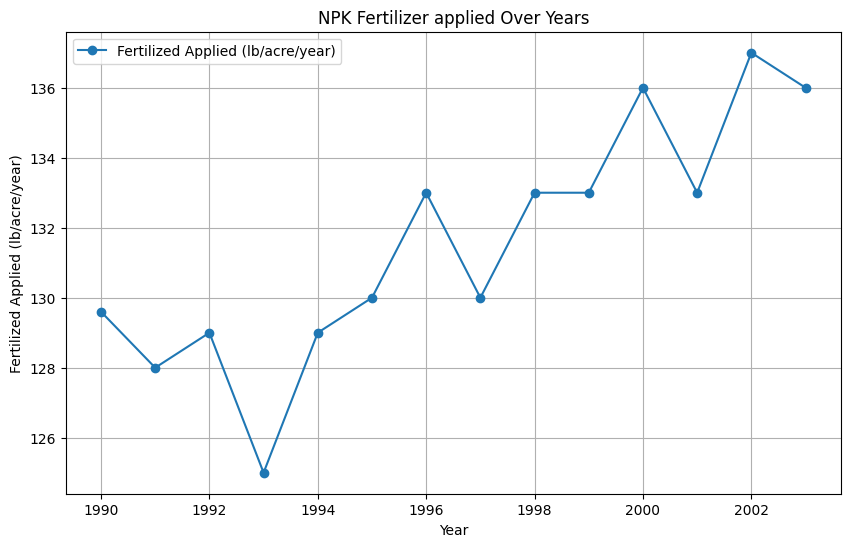

In [102]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
# Extracting relevant columns
years = nitrogen_crop_data_percent['year']
fertilized_applied = nitrogen_crop_data_percent['fertilized_applied_in_lb_per_acre_year']
corn_produced = nitrogen_crop_data_percent['corn_produced_in_bu']
percent_treated = nitrogen_crop_data_percent['percent_of_crop_treated']

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(years, fertilized_applied, label='Fertilized Applied (lb/acre/year)', marker='o')
# plt.plot(years, corn_produced, label='Corn Produced (bu)', marker='o')
# plt.plot(years, percent_treated, label='Percent of Crop Treated (%)', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Fertilized Applied (lb/acre/year)')
plt.title('NPK Fertilizer applied Over Years')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [222]:
nitrogen_crop_data_percent.to_csv("nitrogen_crop_data_percent.csv", index=False)

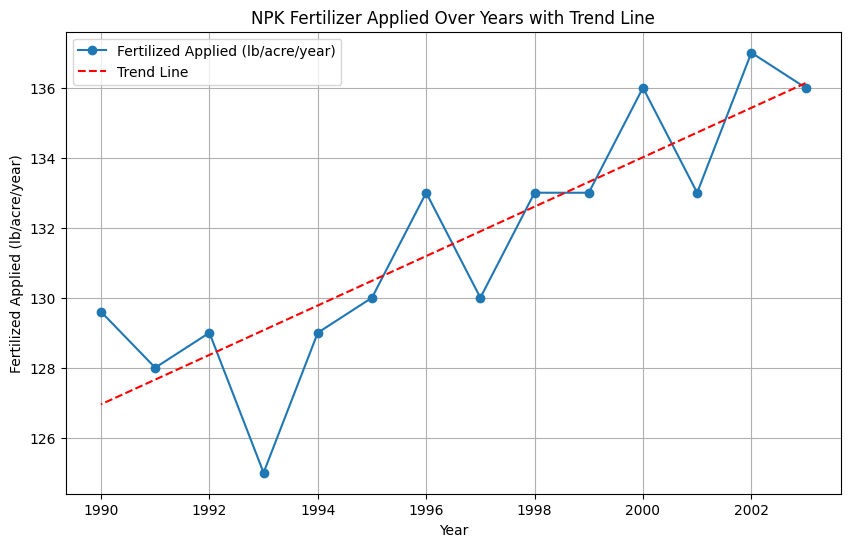

Trend Line Equation: y = 0.71 * x + -1277.85


In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression

years = nitrogen_crop_data_percent['year']
fertilized_applied = nitrogen_crop_data_percent['fertilized_applied_in_lb_per_acre_year']
corn_produced = nitrogen_crop_data_percent['corn_produced_in_bu']
percent_treated = nitrogen_crop_data_percent['percent_of_crop_treated']


# Fit a linear regression model
regression_model = LinearRegression()
X = years.values.reshape(-1, 1)
y = fertilized_applied.values.reshape(-1, 1)
regression_model.fit(X, y)
y_pred = regression_model.predict(X)

# Plotting the data and trend line
plt.figure(figsize=(10, 6))

plt.plot(years, fertilized_applied, label='Fertilized Applied (lb/acre/year)', marker='o')
plt.plot(years, y_pred, label='Trend Line', linestyle='--', color='red')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Fertilized Applied (lb/acre/year)')
plt.title('NPK Fertilizer Applied Over Years with Trend Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Interpret the variation
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
print(f'Trend Line Equation: y = {slope:.2f} * x + {intercept:.2f}')

Clearly, above variation - depicts an increasing used of Nitrogen Fertilizer over the decade between 1990 - 2003, with overall avg increase of 12 lb/acre

Below summarizes the variation in the amount of Nitrogen used over the years between 1990 - 2003

In [106]:
nitrogen_crop_data_percent['fertilized_applied_in_lb_per_acre_year'].describe()

count     14.000000
mean     131.542857
std        3.451135
min      125.000000
25%      129.150000
50%      131.500000
75%      133.000000
max      137.000000
Name: fertilized_applied_in_lb_per_acre_year, dtype: float64

Othe variations related to Nitrogen usage, how corn production varied over the years, which is also an increasing curve

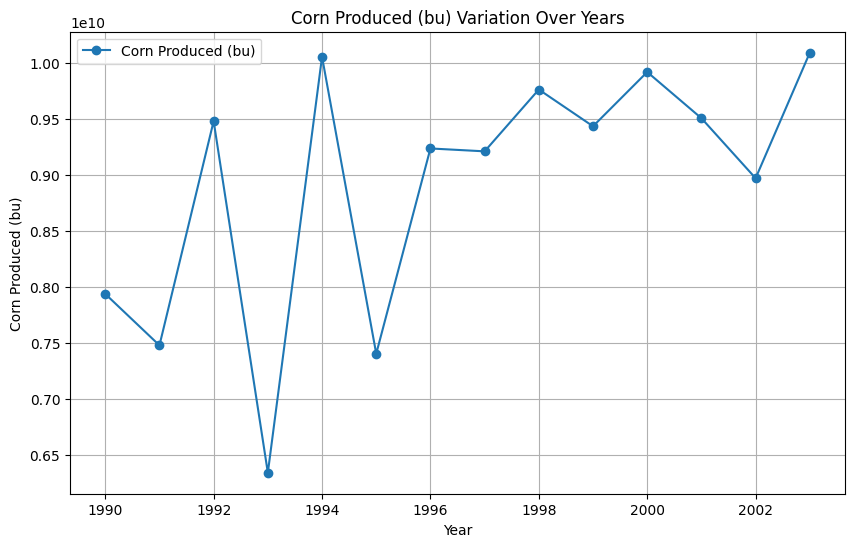

In [101]:
plt.figure(figsize=(10, 6))

plt.plot(years, corn_produced, label='Corn Produced (bu)', marker='o')
plt.xlabel('Year')
plt.ylabel('Corn Produced (bu)')
plt.title('Corn Produced (bu) Variation Over Years')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Percentage of crop produced that was treated with fertilized varies as shown below, which again depicts and increasing trend, which more downward fluctuations in the recent years

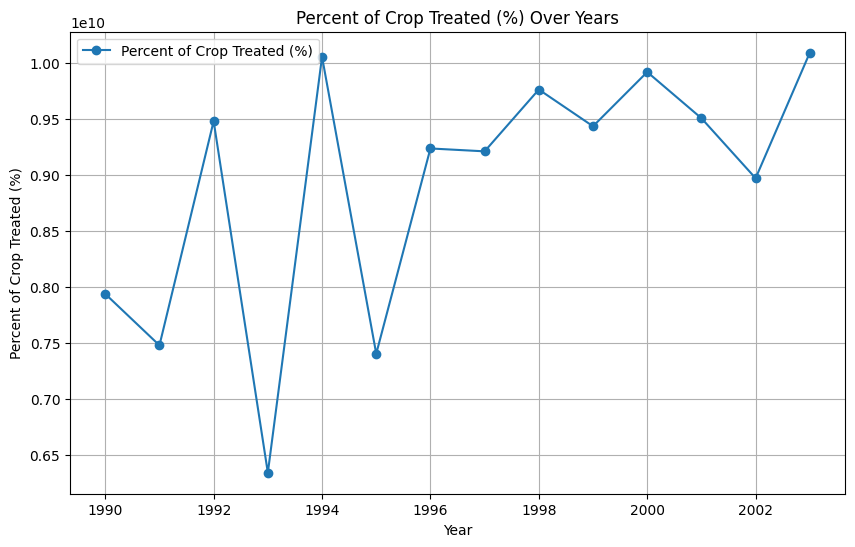

In [103]:
plt.figure(figsize=(10, 6))

plt.plot(years, corn_produced, label='Percent of Crop Treated (%)', marker='o')
plt.xlabel('Year')
plt.ylabel('Percent of Crop Treated (%)')
plt.title('Percent of Crop Treated (%) Over Years')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [98]:
nitrogen_crop_data_percent.columns

Index(['year', 'fertilized_applied_in_lb_per_acre_year', 'corn_produced_in_bu',
       'percent_of_crop_treated'],
      dtype='object')

In [86]:
nitrogen_df.groupby(['data_item']).size()

data_item
CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG    42
CORN - TREATED, MEASURED IN PCT OF AREA PLANTED, AVG      42
dtype: int64

1. The positive trend in nitrogen application suggests an overall increase in nitrogen use per acre for corn cultivation over the specified period.
2. The descriptive statistics provide a summary of the variability and average values of nitrogen application and corn production.
131.5 lb/acres of nitrogen used in average every year
3. Correlation between Corn Production and Nitrogen Fertilizer used: 0.67, depicts a strong impact of nitrogen use on crop production.

In [121]:
nitrogen_crop_data_percent.describe()

,year,fertilized_applied_in_lb_per_acre_year,corn_produced_in_bu,percent_of_crop_treated
count,14.0000,14.000000,1.400000e+01,14.000000
mean,1996.5000,131.542857,8.912442e+09,97.078571
std,4.1833,3.451135,1.159070e+09,0.989311
min,1990.0000,125.000000,6.337730e+09,96.000000
25%,1993.2500,129.150000,8.192218e+09,96.025000
50%,1996.5000,131.500000,9.331584e+09,97.000000
75%,1999.7500,133.000000,9.694659e+09,98.000000
max,2003.0000,137.000000,1.008729e+10,99.000000


In [120]:
import pandas as pd

# Assuming 'nitrogen_crop_data_percent' is your DataFrame
correlation_nitrogen = nitrogen_crop_data_percent['fertilized_applied_in_lb_per_acre_year'].corr(nitrogen_crop_data_percent['year'])
correlation_corn = nitrogen_crop_data_percent['corn_produced_in_bu'].corr(nitrogen_crop_data_percent['year'])

correlation_corn_nitrogen = nitrogen_crop_data_percent['corn_produced_in_bu'].corr(nitrogen_crop_data_percent['fertilized_applied_in_lb_per_acre_year'])

print(f'Correlation between Nitrogen Applied and Year: {correlation_nitrogen:.2f}')
print(f'Correlation between Corn Production and Year: {correlation_corn:.2f}')
print(f'Correlation between Corn Production and Nitrogen Fertilizer used: {correlation_corn_nitrogen:.2f}')

Correlation between Nitrogen Applied and Year: 0.86
Correlation between Corn Production and Year: 0.58
Correlation between Corn Production and Nitrogen Fertilizer used: 0.67


### Q4. 'Fertilizer prices go up whenever the crop prices grow up' 

- is what the crop growers believe, 

- Interpreting this with economics and data

This observation can be analyzed with the fundamental principle of Supply and Demand in Economics.

Instead, of directly relating the increased affordability of farmers with higher incomes resulting from crop price hikes, it can be viewed as a result of increasing demand of fertilizers caused by increased affordability, which in turn is due to crop price increase.


For instance, Increase in crop prices - increases the income of crop grower, thereby increasing affordability of fertilizers - which in turn increases the demand for fertilizers, for their forthcoming harvests. 

Similarly, it's important to note this can be a misleading causation - where crop prices are believed to cause fertilizer price hikes, while the relationship can be bidirectional, or even the inverse. That is, initial fertilizer price hike could increase the crop prices due to the increased cost involved, which in turn could further increase the fertilizer prices in future, due to increase in demand.

Their argument also assumes that the changes in supply and demand are quickly reflected in prices, that markets are efficient in responding to changes in economic conditions. This might sometimes not satisfy, as we observe cases where despite increased food prices, the income of crop growers are still stagnant, due to contracts and intermediate suppliers involved.

To further validate this argument, we can visualize the crop and fertilizer price variation over the harvest cycles.


### Desribe any key trends in planted and harvested corn acres between 1980 - 2022

In [122]:
corn_df.columns

Index(['year', 'geo_level', 'state', 'commodity', 'data_item', 'value'], dtype='object')

In [128]:
corn_df.groupby(['data_item', 'commodity', 'state','geo_level']).agg({'value': 'mean', 'year': 'nunique'})

,,,,value,year
data_item,commodity,state,geo_level,,
CORN - ACRES PLANTED,CORN,US TOTAL,NATIONAL,8.215544e+07,43
"CORN, GRAIN - ACRES HARVESTED",CORN,US TOTAL,NATIONAL,7.431328e+07,43
"CORN, GRAIN - PRODUCTION, MEASURED IN BU",CORN,US TOTAL,NATIONAL,1.036433e+10,43


In [129]:
corn_df.groupby(['data_item', 'commodity', 'state', 'geo_level']).agg({
    'value': ['mean', 'nunique', 'min', 'max', 'median', 'std']
})


value  \
                                                                               mean   
data_item                                commodity state    geo_level                 
CORN - ACRES PLANTED                     CORN      US TOTAL NATIONAL   8.215544e+07   
CORN, GRAIN - ACRES HARVESTED            CORN      US TOTAL NATIONAL   7.431328e+07   
CORN, GRAIN - PRODUCTION, MEASURED IN BU CORN      US TOTAL NATIONAL   1.036433e+10   

                                                                               \
                                                                      nunique   
data_item                                commodity state    geo_level           
CORN - ACRES PLANTED                     CORN      US TOTAL NATIONAL       43   
CORN, GRAIN - ACRES HARVESTED            CORN      US TOTAL NATIONAL       43   
CORN, GRAIN - PRODUCTION, MEASURED IN BU CORN      US TOTAL NATIONAL       43   

                                                                                   \
                                                                              min   
data_item                                commodity state    geo_level               
CORN - ACRES PLANTED                     CORN      US TOTAL NATIONAL     60207000   
CORN, GRAIN - ACRES HARVESTED            CORN      US TOTAL NATIONAL     51479000   
CORN, GRAIN - PRODUCTION, MEASURED IN BU CORN      US TOTAL NATIONAL   4174251000   

                                                                                    \
                                                                               max   
data_item                                commodity state    geo_level                
CORN - ACRES PLANTED                     CORN      US TOTAL NATIONAL      97291000   
CORN, GRAIN - ACRES HARVESTED            CORN      US TOTAL NATIONAL      87461000   
CORN, GRAIN - PRODUCTION, MEASURED IN BU CORN      US TOTAL NATIONAL   15148038000   

                                                                                     \
                                                                             median   
data_item                                commodity state    geo_level                 
CORN - ACRES PLANTED                     CORN      US TOTAL NATIONAL   8.092900e+07   
CORN, GRAIN - ACRES HARVESTED            CORN      US TOTAL NATIONAL   7.271900e+07   
CORN, GRAIN - PRODUCTION, MEASURED IN BU CORN      US TOTAL NATIONAL   9.915051e+09   

                                                                                     
                                                                                std  
data_item                                commodity state    geo_level                
CORN - ACRES PLANTED                     CORN      US TOTAL NATIONAL   8.274675e+06  
CORN, GRAIN - ACRES HARVESTED            CORN      US TOTAL NATIONAL   8.271336e+06  
CORN, GRAIN - PRODUCTION, MEASURED IN BU CORN      US TOTAL NATIONAL   2.891049e+09

In [126]:
corn_df_planted = corn_df.loc[corn_df['data_item'] == 'CORN - ACRES PLANTED']
corn_df_harvested = corn_df.loc[corn_df['data_item'] == 'CORN, GRAIN - ACRES HARVESTED']

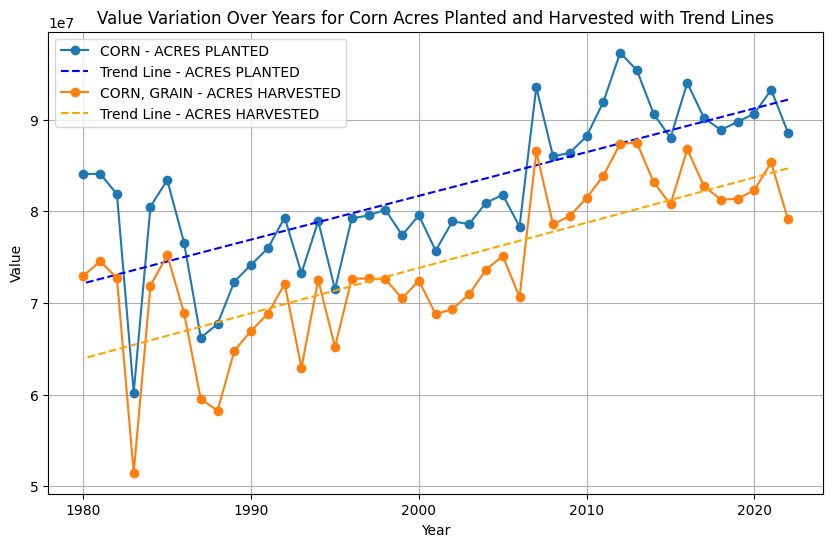

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'corn_df_planted' and 'corn_df_harvested' are your DataFrames
plt.figure(figsize=(10, 6))

# Plotting ACRES PLANTED
plt.plot(corn_df_planted['year'], corn_df_planted['value'], label='CORN - ACRES PLANTED', marker='o')

# Fit a linear regression model for ACRES PLANTED
regression_model_planted = LinearRegression()
X_planted = corn_df_planted['year'].values.reshape(-1, 1)
y_planted = corn_df_planted['value'].values.reshape(-1, 1)
regression_model_planted.fit(X_planted, y_planted)
y_pred_planted = regression_model_planted.predict(X_planted)

# Plotting the trend line for ACRES PLANTED
plt.plot(corn_df_planted['year'], y_pred_planted, linestyle='--', color='blue', label='Trend Line - ACRES PLANTED')

# Plotting ACRES HARVESTED
plt.plot(corn_df_harvested['year'], corn_df_harvested['value'], label='CORN, GRAIN - ACRES HARVESTED', marker='o')

# Fit a linear regression model for ACRES HARVESTED
regression_model_harvested = LinearRegression()
X_harvested = corn_df_harvested['year'].values.reshape(-1, 1)
y_harvested = corn_df_harvested['value'].values.reshape(-1, 1)
regression_model_harvested.fit(X_harvested, y_harvested)
y_pred_harvested = regression_model_harvested.predict(X_harvested)

# Plotting the trend line for ACRES HARVESTED
plt.plot(corn_df_harvested['year'], y_pred_harvested, linestyle='--', color='orange', label='Trend Line - ACRES HARVESTED')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value Variation Over Years for Corn Acres Planted and Harvested with Trend Lines')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [133]:
# Print the trend line equation for ACRES HARVESTED
slope_harvested = regression_model_harvested.coef_[0][0]
intercept_harvested = regression_model_harvested.intercept_[0]
print(f'Trend Line Equation (ACRES HARVESTED): y = {slope_harvested:.2f} * x + {intercept_harvested:.2f}')


# Print the trend line equation for ACRES PLANTED
slope_planted = regression_model_planted.coef_[0][0]
intercept_planted = regression_model_planted.intercept_[0]
print(f'Trend Line Equation (ACRES PLANTED): y = {slope_planted:.2f} * x + {intercept_planted:.2f}')


Trend Line Equation (ACRES HARVESTED): y = 493562.07 * x + -913304414.68
Trend Line Equation (ACRES PLANTED): y = 476885.99 * x + -872093416.34


In [137]:
corn_df_harvested['value'].describe()

count    4.300000e+01
mean     7.431328e+07
std      8.271336e+06
min      5.147900e+07
25%      6.990850e+07
50%      7.271900e+07
75%      8.130650e+07
max      8.746100e+07
Name: value, dtype: float64

In [136]:
corn_df_planted['value'].describe()

count    4.300000e+01
mean     8.215544e+07
std      8.274675e+06
min      6.020700e+07
25%      7.785650e+07
50%      8.092900e+07
75%      8.873000e+07
max      9.729100e+07
Name: value, dtype: float64

In [146]:
corn_df_harvested.columns = ['year', 'geo_level', 'state', 'commodity', 'data_item', 'harvest_volume']

In [142]:
corn_df_planted.columns = ['year', 'geo_level', 'state', 'commodity', 'data_item', 'planted_volume']

In [148]:
corn_planted_vs_harvested = corn_df_harvested[['year', 'harvest_volume']].merge(corn_df_planted[['year', 'planted_volume']], on = 'year')
corn_planted_vs_harvested.head()

corn_planted_vs_harvested['harvest_ratio'] = corn_planted_vs_harvested['harvest_volume']/corn_planted_vs_harvested['planted_volume']
corn_planted_vs_harvested['harvest_ratio']

0     0.893057
1     0.914919
2     0.908011
3     0.906312
4     0.914539
5     0.917553
6     0.922812
7     0.917450
8     0.917757
9     0.917118
10    0.897976
11    0.912363
12    0.923508
13    0.920215
14    0.913796
15    0.925080
16    0.901835
17    0.918537
18    0.909822
19    0.902561
20    0.878774
21    0.908404
22    0.910611
23    0.910850
24    0.905495
25    0.913675
26    0.916886
27    0.912296
28    0.918818
29    0.859283
30    0.908789
31    0.906065
32    0.902732
33    0.895758
34    0.860198
35    0.898867
36    0.899804
37    0.901808
38    0.892942
39    0.855033
40    0.888366
41    0.886167
42    0.868139
Name: harvest_ratio, dtype: float64

In [153]:
corn_df_harvested.columns

Index(['year', 'geo_level', 'state', 'commodity', 'data_item',
       'harvest_volume'],
      dtype='object')

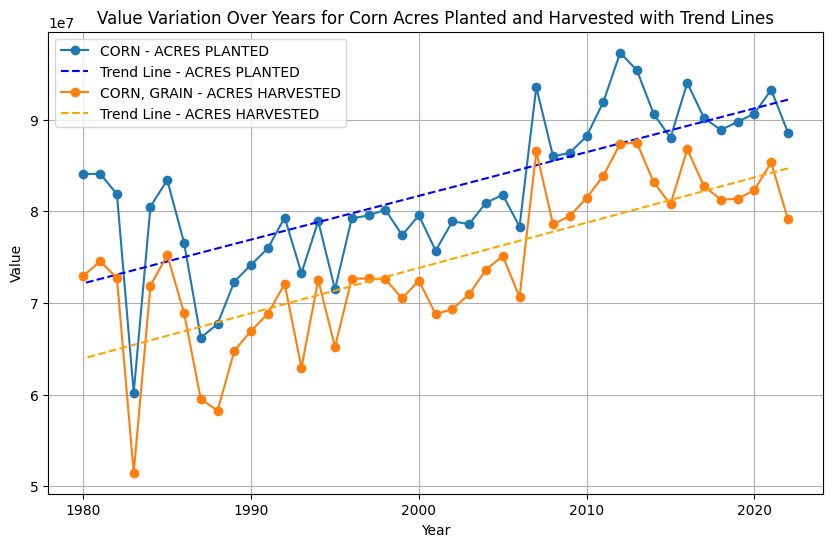

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming 'corn_df_planted' and 'corn_df_harvested' are your DataFrames
plt.figure(figsize=(10, 6))

# Plotting ACRES PLANTED
plt.plot(corn_df_planted['year'], corn_df_planted['planted_volume'], label='CORN - ACRES PLANTED', marker='o')

# Fit a linear regression model for ACRES PLANTED
regression_model_planted = LinearRegression()
X_planted = corn_df_planted['year'].values.reshape(-1, 1)
y_planted = corn_df_planted['planted_volume'].values.reshape(-1, 1)
regression_model_planted.fit(X_planted, y_planted)
y_pred_planted = regression_model_planted.predict(X_planted)

# Plotting the trend line for ACRES PLANTED
plt.plot(corn_df_planted['year'], y_pred_planted, linestyle='--', color='blue', label='Trend Line - ACRES PLANTED')

# Plotting ACRES HARVESTED
plt.plot(corn_df_harvested['year'], corn_df_harvested['harvest_volume'], label='CORN, GRAIN - ACRES HARVESTED', marker='o')


# Fit a linear regression model for ACRES HARVESTED
regression_model_harvested = LinearRegression()
X_harvested = corn_df_harvested['year'].values.reshape(-1, 1)
y_harvested = corn_df_harvested['harvest_volume'].values.reshape(-1, 1)
regression_model_harvested.fit(X_harvested, y_harvested)
y_pred_harvested = regression_model_harvested.predict(X_harvested)

# Plotting the trend line for ACRES HARVESTED
plt.plot(corn_df_harvested['year'], y_pred_harvested, linestyle='--', color='orange', label='Trend Line - ACRES HARVESTED')


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value Variation Over Years for Corn Acres Planted and Harvested with Trend Lines')
plt.legend()
plt.grid(True)



# Show the plot
plt.show()


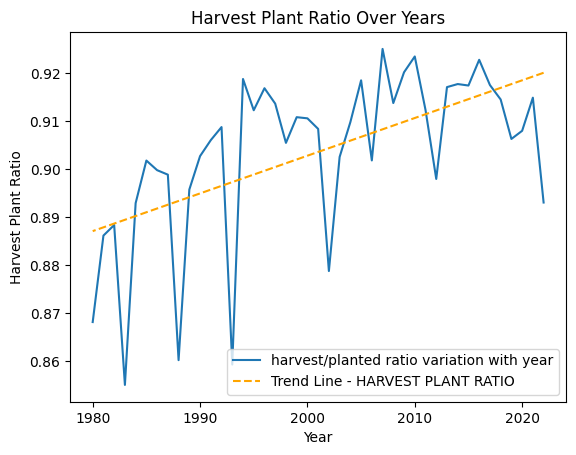

Trend Line Equation of Harvest plant ratio with time: y = 0.00079 * x + -0.67


In [160]:
plt.plot(corn_planted_vs_harvested['year'], corn_planted_vs_harvested['harvest_ratio'], label = 'harvest/planted ratio variation with year')

# Fit a linear regression model for ACRES HARVESTED
regression_model_harvest_ratio = LinearRegression()
X_harvested = corn_planted_vs_harvested['year'].values.reshape(-1, 1)
y_harvested = corn_planted_vs_harvested['harvest_ratio'].values.reshape(-1, 1)
regression_model_harvest_ratio.fit(X_harvested, y_harvested)
y_pred_harvested = regression_model_harvest_ratio.predict(X_harvested)
plt.plot(corn_planted_vs_harvested['year'], y_pred_harvested, linestyle='--', color='orange', label='Trend Line - HARVEST PLANT RATIO')

plt.xlabel('Year')
plt.ylabel('Harvest Plant Ratio')
plt.title('Harvest Plant Ratio Over Years')
plt.legend()
plt.show()

# Print the trend line equation for ACRES HARVESTED
slope_harvested = regression_model_harvest_ratio.coef_[0][0]
intercept_harvested = regression_model_harvest_ratio.intercept_[0]
print(f'Trend Line Equation of Harvest plant ratio with time: y = {slope_harvested:.5f} * x + {intercept_harvested:.2f}')


Harvest planted ratio slightly increases over the years

In [224]:
corn_df

,year,geo_level,state,commodity,data_item,value
0,2022,NATIONAL,US TOTAL,CORN,CORN - ACRES PLANTED,88589000
1,2022,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - ACRES HARVESTED",79115000
2,2022,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",13714676000
3,2021,NATIONAL,US TOTAL,CORN,CORN - ACRES PLANTED,93252000
4,2021,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - ACRES HARVESTED",85318000
...,...,...,...,...,...,...
124,1981,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - ACRES HARVESTED",74524000
125,1981,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",8118650000
126,1980,NATIONAL,US TOTAL,CORN,CORN - ACRES PLANTED,84043000
127,1980,NATIONAL,US TOTAL,CORN,"CORN, GRAIN - ACRES HARVESTED",72961000


In [226]:
corn_planted_vs_harvested.to_csv("corn_planted_vs_harvested.csv", index=False)

In [161]:
corn_planted_vs_harvested.columns

Index(['year', 'harvest_volume', 'planted_volume', 'harvest_ratio'], dtype='object')

In [170]:
# Calculate differences between consecutive years
corn_planted_vs_harvested.sort_values(by = 'year', inplace=True)

corn_planted_vs_harvested['harvest_delta'] = corn_planted_vs_harvested['harvest_volume'].diff()
corn_planted_vs_harvested['plant_delta'] = corn_planted_vs_harvested['planted_volume'].diff()

# Find the year with the maximum positive delta
max_positive_year = corn_planted_vs_harvested.loc[corn_planted_vs_harvested['harvest_delta'].idxmax(), 'year']

# Find the year with the minimum negative delta
max_negative_year = corn_planted_vs_harvested.loc[corn_planted_vs_harvested['harvest_delta'].idxmin(), 'year']
print("Variation in harvest volume")
print(f"Year with maximum positive delta: {max_positive_year}")
print(f"Year with maximum negative delta: {max_negative_year}")
max_negative_year = corn_planted_vs_harvested.sort_values(by = 'harvest_delta')
# Find the year with the maximum positive delta
max_positive_year = corn_planted_vs_harvested.loc[corn_planted_vs_harvested['planted_volume'].idxmax(), 'year']

# Find the year with the maximum negative delta
max_negative_year = corn_planted_vs_harvested.loc[corn_planted_vs_harvested['planted_volume'].idxmin(), 'year']
print("Variation in Plant volume")
print(f"Year with maximum positive delta: {max_positive_year}")
print(f"Year with maximum negative delta: {max_negative_year}")

Variation in harvest volume
Year with maximum positive delta: 1984
Year with maximum negative delta: 1983
Variation in Plant volume
Year with maximum positive delta: 2012
Year with maximum negative delta: 1983


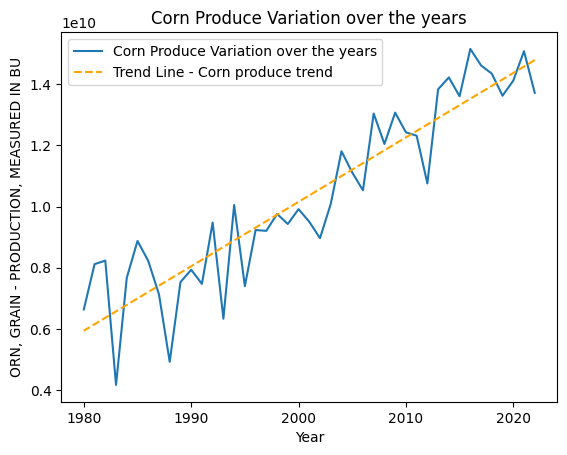

Trend Line Equation of Harvest plant ratio with time: y = 210421842.94775 * x + -410689781319.84


In [176]:
corn_produce = corn_df.loc[corn_df['data_item'] == 'CORN, GRAIN - PRODUCTION, MEASURED IN BU']
corn_produce

plt.plot(corn_produce['year'], corn_produce['value'], label = 'Corn Produce Variation over the years')

# Fit a linear regression model for ACRES HARVESTED
regression_model_harvest_ratio = LinearRegression()
X_harvested = corn_produce['year'].values.reshape(-1, 1)
y_harvested = corn_produce['value'].values.reshape(-1, 1)
regression_model_harvest_ratio.fit(X_harvested, y_harvested)
y_pred_harvested = regression_model_harvest_ratio.predict(X_harvested)
plt.plot(corn_produce['year'], y_pred_harvested, linestyle='--', color='orange', label='Trend Line - Corn produce trend')

plt.xlabel('Year')
plt.ylabel('ORN, GRAIN - PRODUCTION, MEASURED IN BU')
plt.title('Corn Produce Variation over the years')
plt.legend()
plt.show()

# Print the trend line equation for ACRES HARVESTED
slope_harvested = regression_model_harvest_ratio.coef_[0][0]
intercept_harvested = regression_model_harvest_ratio.intercept_[0]
print(f'Trend Line Equation of Harvest plant ratio with time: y = {slope_harvested:.5f} * x + {intercept_harvested:.2f}')


In [177]:
corn_produce['value'].describe()

count    4.300000e+01
mean     1.036433e+10
std      2.891049e+09
min      4.174251e+09
25%      8.172207e+09
50%      9.915051e+09
75%      1.305252e+10
max      1.514804e+10
Name: value, dtype: float64

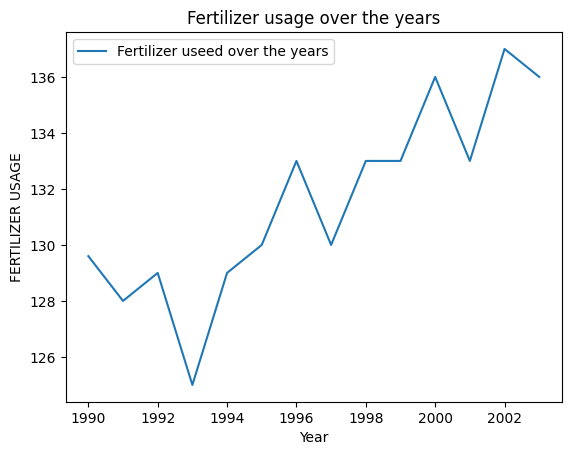

In [180]:
plt.plot(nitrogen_crop_data['year'], nitrogen_crop_data['fertilized_applied_in_lb_per_acre_year'], label = 'Fertilizer useed over the years')


plt.xlabel('Year')
plt.ylabel('FERTILIZER USAGE')
plt.title('Fertilizer usage over the years')
plt.legend()
plt.show()


In [178]:
nitrogen_crop_data

,year,fertilized_applied_in_lb_per_acre_year,corn_produced_in_bu
0,2003,136.0,10087292000
1,2002,137.0,8966787000
2,2001,133.0,9502580000
3,2000,136.0,9915051000
4,1999,133.0,9430612000
5,1998,133.0,9758685000
6,1997,130.0,9206832000
7,1996,133.0,9232557000
8,1995,130.0,7400051000
9,1994,129.0,10050520000


High value of coefficient depicts a significant increase in produce over the years



Q7. Any years where we can anticipate a lower demand in Nitrogen?

In [204]:
nitrogen_df.columns

Index(['year', 'geo_level', 'region', 'commodity', 'data_item', 'domain',
       'domain_category', 'value'],
      dtype='object')

In [214]:
nitrogen_usage = nitrogen_df.loc[((nitrogen_df['data_item'] == 'CORN - APPLICATIONS, MEASURED IN LB / ACRE / YEAR, AVG') & (nitrogen_df['domain_category'] == 'FERTILIZER: (NITROGEN)')), ['year', 'value']]
nitrogen_usage.columns = ['year', 'nitrogen_used']
nitrogen_usage.shape

(14, 2)

In [215]:
nitrogen_usage = nitrogen_usage.merge(corn_produce[['year', 'value']], on = 'year')
nitrogen_usage

,year,nitrogen_used,value
0,2003,136.0,10087292000
1,2002,137.0,8966787000
2,2001,133.0,9502580000
3,2000,136.0,9915051000
4,1999,133.0,9430612000
5,1998,133.0,9758685000
6,1997,130.0,9206832000
7,1996,133.0,9232557000
8,1995,130.0,7400051000
9,1994,129.0,10050520000


In [229]:
nitrogen_usage.to_csv("nitrogen_usage.csv", index=False)

In [230]:
nitrogen_usage.columns

Index(['year', 'nitrogen_used', 'value'], dtype='object')

In [231]:
nitrogen_crop_data_percent.columns

Index(['year', 'fertilized_applied_in_lb_per_acre_year', 'corn_produced_in_bu',
       'percent_of_crop_treated'],
      dtype='object')

In [232]:
corn_planted_vs_harvested.columns

Index(['year', 'harvest_volume', 'planted_volume', 'harvest_ratio',
       'harvest_delta', 'plant_delta'],
      dtype='object')

In [235]:
combined_df = nitrogen_usage[['year', 'nitrogen_used']].merge(nitrogen_crop_data_percent, on = 'year')
combined_df = combined_df.merge(corn_planted_vs_harvested, on = 'year')
combined_df

,year,nitrogen_used,fertilized_applied_in_lb_per_acre_year,corn_produced_in_bu,percent_of_crop_treated,harvest_volume,planted_volume,harvest_ratio,harvest_delta,plant_delta
0,2003,136.0,136.0,10087292000,96.0,70944000,78603000,0.902561,1614000.0,-291000.0
1,2002,137.0,137.0,8966787000,96.0,69330000,78894000,0.878774,562000.0,3192000.0
2,2001,133.0,133.0,9502580000,96.0,68768000,75702000,0.908404,-3672000.0,-3849000.0
3,2000,136.0,136.0,9915051000,98.0,72440000,79551000,0.910611,1953000.0,2165000.0
4,1999,133.0,133.0,9430612000,98.0,70487000,77386000,0.910850,-2102000.0,-2779000.0
5,1998,133.0,133.0,9758685000,98.0,72589000,80165000,0.905495,-82000.0,628000.0
6,1997,130.0,130.0,9206832000,99.0,72671000,79537000,0.913675,27000.0,308000.0
7,1996,133.0,133.0,9232557000,98.0,72644000,79229000,0.916886,7434000.0,7750000.0
8,1995,130.0,130.0,7400051000,97.0,65210000,71479000,0.912296,-7304000.0,-7442000.0
9,1994,129.0,129.0,10050520000,97.0,72514000,78921000,0.918818,9581000.0,5682000.0


In [236]:
combined_df.to_csv("crop_analysis.csv", index=False)

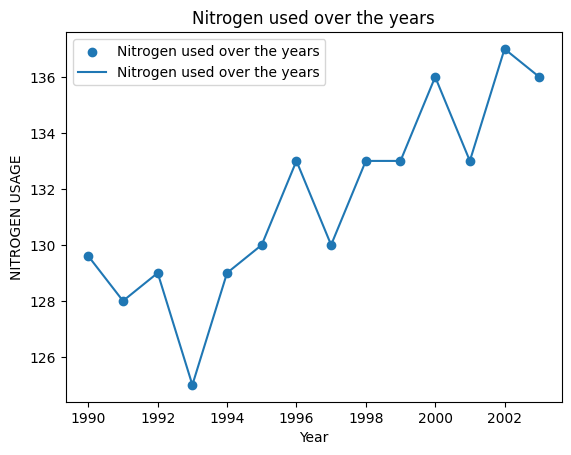

In [217]:
plt.scatter(nitrogen_usage['year'], nitrogen_usage['nitrogen_used'], label = 'Nitrogen used over the years')
plt.plot(nitrogen_usage['year'], nitrogen_usage['nitrogen_used'], label = 'Nitrogen used over the years')

plt.xlabel('Year')
plt.ylabel('NITROGEN USAGE')
plt.title('Nitrogen used over the years')
plt.legend()
plt.show()


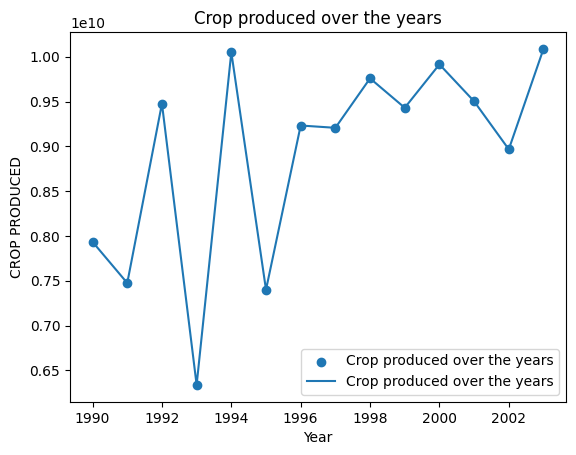

In [219]:
plt.scatter(nitrogen_usage['year'], nitrogen_usage['value'], label = 'Crop produced over the years')
plt.plot(nitrogen_usage['year'], nitrogen_usage['value'], label = 'Crop produced over the years')


plt.xlabel('Year')
plt.ylabel('CROP PRODUCED')
plt.title('Crop produced over the years')
plt.legend()
plt.show()


A pattern can be observed where even years are where the Nitrogen usage grows or rarely stays the same, while odd years - the usage drops or stagnates

In [203]:
nitrogen_usage

,year,value
0,2003,136.0
6,2002,137.0
12,2001,133.0
18,2000,136.0
24,1999,133.0
30,1998,133.0
36,1997,130.0
42,1996,133.0
48,1995,130.0
54,1994,129.0


```A pattern can be observed where Even years are where the Nitrogen usage grows or sometime stays the same, while odd years - the usage drops or stagnates. Similarly, the crop production also peaks and drops at the same points as before, with an exception for the years 2002, and 2003. The deviation can be caused by other external factors like climatic changes, or events like famine, and other economic conditions on which we don't have sufficient information to investigate. Also, the pattern emerged can be interpreted as alternating every year, to balance the supply and demand cycle for crops and fertilizers, so we can anticipate an alternating trend for the future years, given there are no significant variations in external conditions for that year.```